![Example image](https://upload.wikimedia.org/wikipedia/commons/0/02/Northeastern_Wordmark.svg)

# Naive Bayes

Copyright: Prof. Shanu Sushmita

In [7]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import re
import numpy as np
import pandas as pd
#Tokenization of text
from nltk.tokenize import word_tokenize,sent_tokenize
#remove stop-words
from nltk.corpus import stopwords # library
nltk.download('stopwords')
all_stopwords = set(stopwords.words('english')) # set the language
from typing import List

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# reading review data with panda frames
reviews_data=pd.read_csv('IMDB Dataset.csv')
# reviews_data.describe()

In [9]:
positive_reviews = reviews_data[reviews_data['sentiment'] == 'positive'].head(500)
negative_reviews = reviews_data[reviews_data['sentiment'] == 'negative'].head(500)


In [10]:
# Tokenize positive reviews
positive_reviews['tokens'] = positive_reviews['review'].apply(word_tokenize)

# Tokenize negative reviews
negative_reviews['tokens'] = negative_reviews['review'].apply(word_tokenize)




In [11]:
def preprocess_text(text: str) -> List[str]:
    # Looking at the text we see that <br></br> which is HTML tag for line break can be a good splitter
    # A sentence (atleast well structured) often has a full spot at the end. We use these two for word breaks
    pattern1 = re.compile("<br /><br />|\.")
    lines = re.split(pattern1, text)
    # you can break a sentence into words using whitespace based split
    tokens = []
    for line in lines:

        line = re.sub(r"\b([a-zA-Z]+)('ll|'ve|'re|'m|'d|n't|'s)\b",r"\1, \2", line)
        tokens += line.split(" ")

    # lowercase and remove any non-alphanumeric characters from tokens for normalize
    normalized_tokens = [re.sub(r"\W+", "", token.lower()) for token in tokens]

    return  " ".join([
            token
            for token in normalized_tokens
            if token and token not in all_stopwords and len(tokens) > 1
        ])



custom_review = "I dog've one reviewers mentioned watching 1 oz episode she'll hooked right exactly happened first thing struck oz brutality unflinching"
custom_review_tokens = preprocess_text(custom_review)
print(custom_review_tokens)

dog one reviewers mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching


In [12]:
#apply preprocessing to review data
all_stopwords = set(stopwords.words('english'))
positive_reviews['processed_review'] = positive_reviews['review'].apply(preprocess_text)
negative_reviews['processed_review'] = negative_reviews['review'].apply(preprocess_text)

pd.set_option('display.max_colwidth', 500)
# Display the first few tokenized reviews
print("Tokenized Positive Reviews:")
print(positive_reviews[['processed_review', 'tokens']].head(1))

print("\nTokenized Negative Reviews:")
print(negative_reviews[['processed_review', 'tokens']].head(1))


Tokenized Positive Reviews:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      processed_review  \
0  one reviewers mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslim

In [13]:
def pos_tag_processed_review(text):
    tokens = word_tokenize(text)  # Tokenize the processed text
    pos_tags = nltk.pos_tag(tokens)  # Apply POS tagging
    return pos_tags

In [14]:
positive_reviews['pos_tags'] = positive_reviews['processed_review'].apply(pos_tag_processed_review)
negative_reviews['pos_tags'] = negative_reviews['processed_review'].apply(pos_tag_processed_review)
print("POS Tagged Positive Review:")
print(positive_reviews[['processed_review', 'pos_tags']].head(1))

print("\nPOS Tagged Negative Review:")
print(negative_reviews[['processed_review', 'pos_tags']].head(1))

POS Tagged Positive Review:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      processed_review  \
0  one reviewers mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslim

In [15]:
import spacy
nlp = spacy.load("en_core_web_sm")


def NER_processed_review(text):
  doc = nlp(text)
  entities = []
  for ent in doc.ents:
    entities.append((ent.text, ent.label_))
  return entities


In [16]:
positive_reviews['ner_tags'] = positive_reviews['processed_review'].apply(NER_processed_review)
negative_reviews['ner_tags'] = negative_reviews['processed_review'].apply(NER_processed_review)

print("NER Positive Review:")
print(positive_reviews[['processed_review', 'ner_tags']].head())

print("\nNER Negative Review:")
print(negative_reviews[['processed_review', 'ner_tags']].head())

NER Positive Review:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      processed_review  \
0  one reviewers mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangs

<ipython-input-47-5b6be2e6a1dc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_barplot = sns.barplot(data=ner_df, x='NER Tag', y='Frequency', palette='viridis')


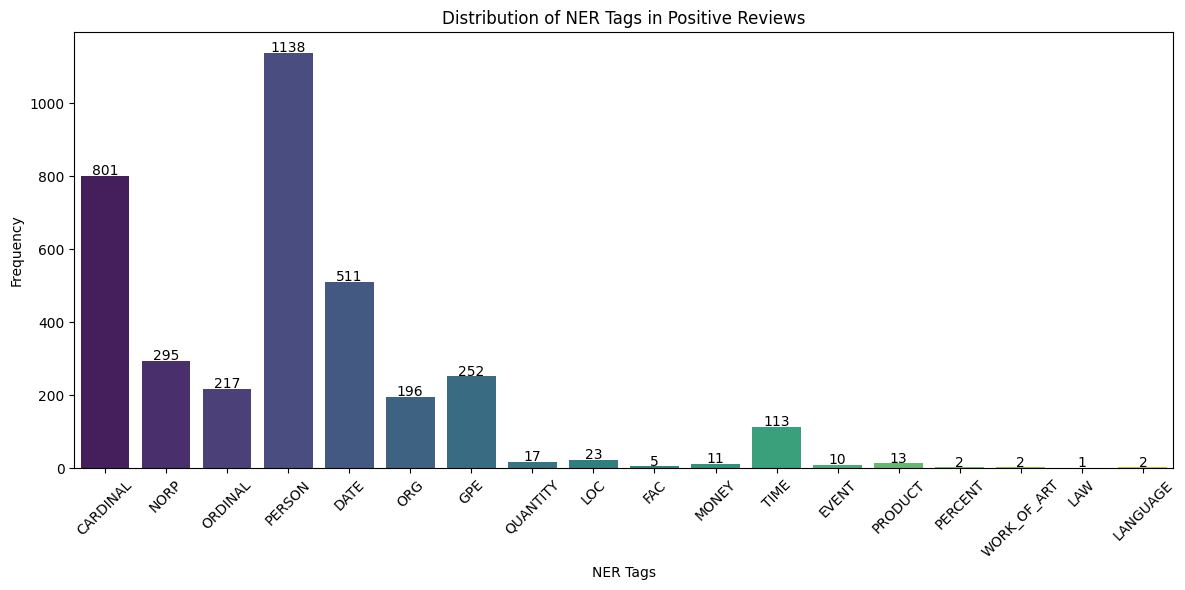

In [47]:
# Distribution of NER Tags in Positive Reviews

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
all_positive_ner_tags = [tag for tags in positive_reviews['ner_tags'] for _, tag in tags]
positive_ner_counts = Counter(all_positive_ner_tags)
ner_df = pd.DataFrame(positive_ner_counts.items(), columns=['NER Tag', 'Frequency']).head(20)
plt.figure(figsize=(12, 6))
sns_barplot = sns.barplot(data=ner_df, x='NER Tag', y='Frequency', palette='viridis')
for index, row in ner_df.iterrows():
    sns_barplot.text(index, row['Frequency'] + 2, str(row['Frequency']), color='black', ha="center")

plt.title('Distribution of NER Tags in Positive Reviews')
plt.xlabel('NER Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-44-82d8751fbd7e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_barplot = sns.barplot(data=ner_df, x='NER Tag', y='Frequency', palette='viridis')


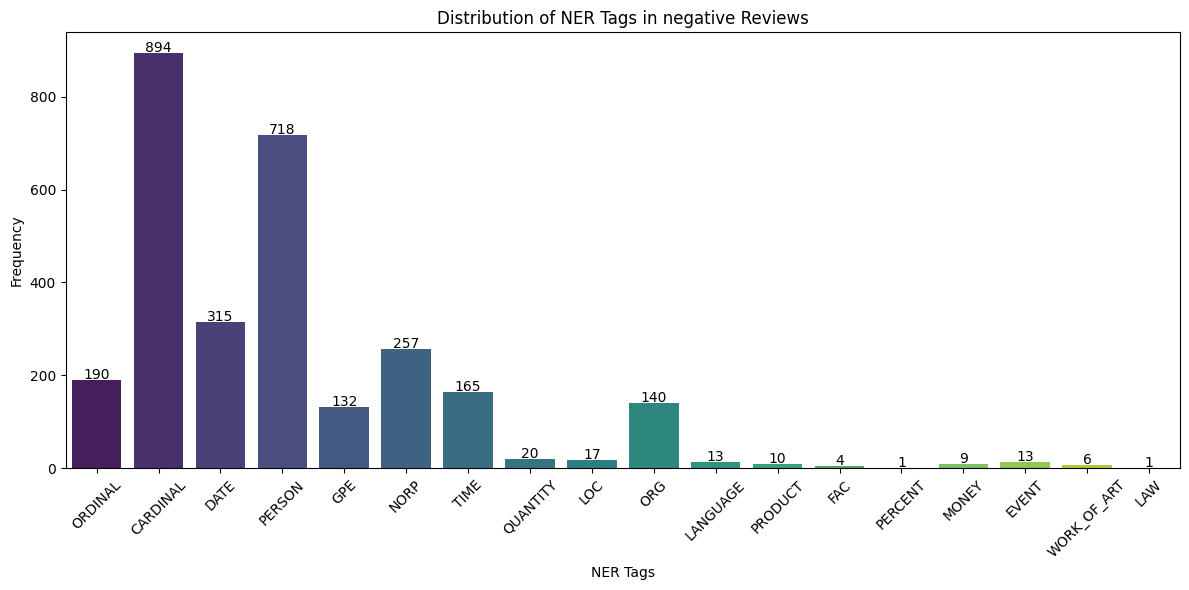

In [44]:
# Distribution of NER Tags in negative Reviews

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
all_negative_ner_tags = [tag for tags in negative_reviews['ner_tags'] for _, tag in tags]
negative_ner_counts = Counter(all_negative_ner_tags)
ner_df = pd.DataFrame(negative_ner_counts.items(), columns=['NER Tag', 'Frequency']).head(20)
plt.figure(figsize=(12, 6))
sns_barplot = sns.barplot(data=ner_df, x='NER Tag', y='Frequency', palette='viridis')
for index, row in ner_df.iterrows():
    sns_barplot.text(index, row['Frequency'] + 2, str(row['Frequency']), color='black', ha="center")

plt.title('Distribution of NER Tags in negative Reviews')
plt.xlabel('NER Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total count of POS tags in positive reviews: 61380


<ipython-input-60-31d75d031637>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_barplot = sns.barplot(data=pos_df, x='POS Tag', y='Frequency', palette='viridis')


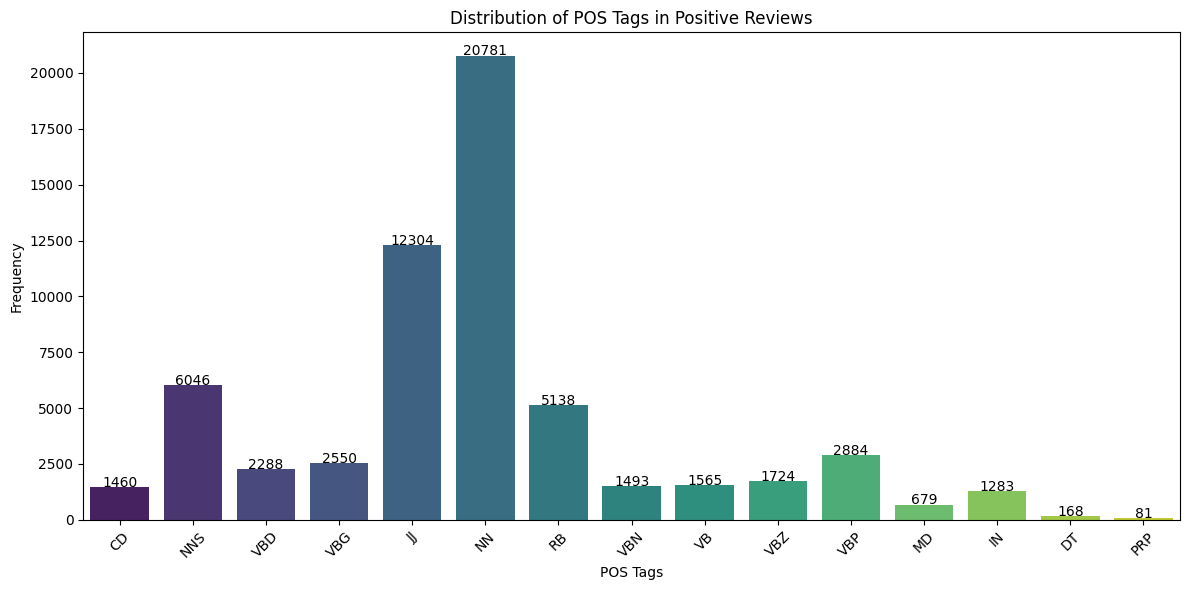

In [60]:
# Distribution of POS Tags in Positive Reviews

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Flatten all POS tags in positive reviews into a single list
all_positive_pos_tags = [tag for tags in positive_reviews['pos_tags'] for _, tag in tags]

# Count frequencies of each POS tag
positive_pos_counts = Counter(all_positive_pos_tags)

# Get the total count of POS tags
total_pos_count = sum(positive_pos_counts.values())
print("Total count of POS tags in positive reviews:", total_pos_count)

# Create DataFrame for plotting and sort by Frequency
pos_df = pd.DataFrame(positive_pos_counts.items(), columns=['POS Tag', 'Frequency']).head(15)



# Plotting
plt.figure(figsize=(12, 6))
sns_barplot = sns.barplot(data=pos_df, x='POS Tag', y='Frequency', palette='viridis')

# Add frequency labels on top of each bar
for index, row in pos_df.iterrows():
    sns_barplot.text(index, row['Frequency'] + 2, str(row['Frequency']), color='black', ha="center")

plt.title('Distribution of POS Tags in Positive Reviews')
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Total count of POS tags in negative reviews: 58305


<ipython-input-62-033ae0094f00>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_barplot = sns.barplot(data=neg_df, x='POS Tag', y='Frequency', palette='viridis')


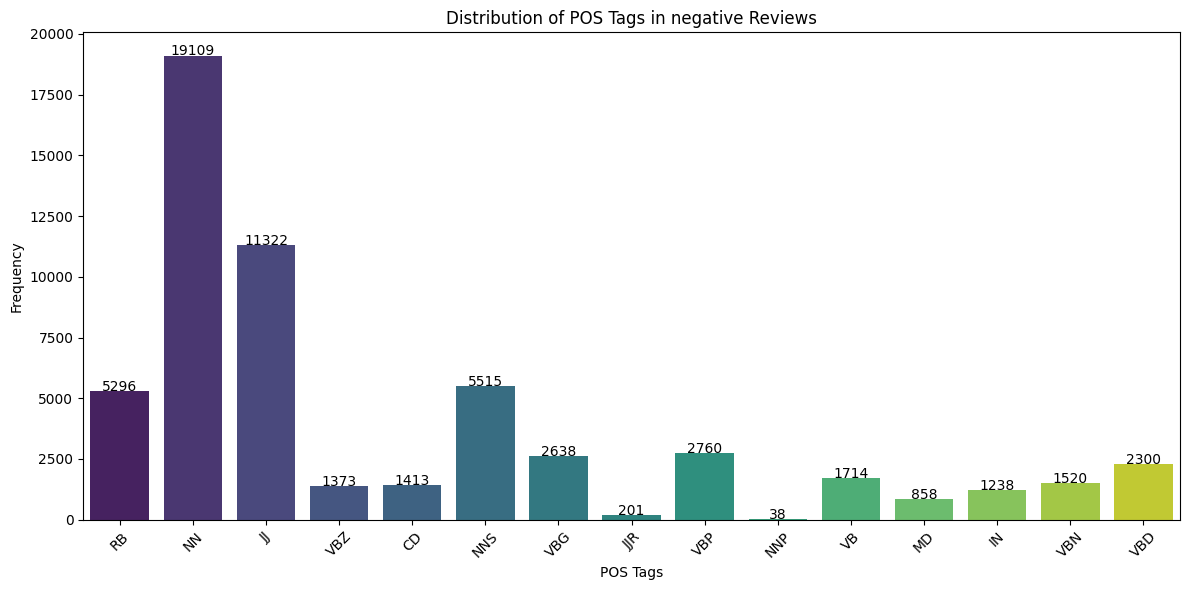

In [62]:
# Distribution of POS Tags in Positive Reviews

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Flatten all POS tags in positive reviews into a single list
all_negative_pos_tags = [tag for tags in negative_reviews['pos_tags'] for _, tag in tags]

# Count frequencies of each POS tag
negative_pos_counts = Counter(all_negative_pos_tags)

# Get the total count of POS tags
total_pos_count = sum(negative_pos_counts.values())
print("Total count of POS tags in negative reviews:", total_pos_count)

# Create DataFrame for plotting and sort by Frequency
neg_df = pd.DataFrame(negative_pos_counts.items(), columns=['POS Tag', 'Frequency']).head(15)



# Plotting
plt.figure(figsize=(12, 6))
sns_barplot = sns.barplot(data=neg_df, x='POS Tag', y='Frequency', palette='viridis')

# Add frequency labels on top of each bar
for index, row in neg_df.iterrows():
    sns_barplot.text(index, row['Frequency'] + 2, str(row['Frequency']), color='black', ha="center")

plt.title('Distribution of POS Tags in negative Reviews')
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
